<a href="https://colab.research.google.com/github/badgujjarajay/fruits-classification/blob/master/face_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Prediction using the trained model.**

**Importing necessary libraries.**

In [ ]:
%reload_ext autoreload
%autoreload 2
%matplotlib inline
from fastai.vision import *
from fastai.metrics import error_rate
import os
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)
warnings.filterwarnings("ignore", category=UserWarning)

**Downloading the trained model.**

In [ ]:
!wget --load-cookies /tmp/cookies.txt "https://docs.google.com/uc?export=download&confirm=$(wget --quiet --save-cookies /tmp/cookies.txt --keep-session-cookies --no-check-certificate 'https://docs.google.com/uc?export=download&id=18E0SFg-JcB-GfsZnq_a5DBG0ormdyhL1' -O- | sed -rn 's/.*confirm=([0-9A-Za-z_]+).*/\1\n/p')&id=18E0SFg-JcB-GfsZnq_a5DBG0ormdyhL1" -O "export.pkl" && rm -rf /tmp/cookies.txt

--2020-08-28 03:38:43--  https://docs.google.com/uc?export=download&confirm=1fUB&id=18E0SFg-JcB-GfsZnq_a5DBG0ormdyhL1
Resolving docs.google.com (docs.google.com)... 172.217.203.113, 172.217.203.101, 172.217.203.100, ...
Connecting to docs.google.com (docs.google.com)|172.217.203.113|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://doc-0g-94-docs.googleusercontent.com/docs/securesc/23e70tg6bcjr0l5h6n0ujd8vr8gp2mu6/7lm0a10pj5t4g44c03sp667m1sa6on52/1598585850000/06045655936260487161/13626247804406740471Z/18E0SFg-JcB-GfsZnq_a5DBG0ormdyhL1?e=download [following]
--2020-08-28 03:38:43--  https://doc-0g-94-docs.googleusercontent.com/docs/securesc/23e70tg6bcjr0l5h6n0ujd8vr8gp2mu6/7lm0a10pj5t4g44c03sp667m1sa6on52/1598585850000/06045655936260487161/13626247804406740471Z/18E0SFg-JcB-GfsZnq_a5DBG0ormdyhL1?e=download
Resolving doc-0g-94-docs.googleusercontent.com (doc-0g-94-docs.googleusercontent.com)... 173.194.214.132, 2607:f8b0:400c:c0b::84
Conne

**Loading the model.**

In [ ]:
predictor = load_learner('/content/')

**Prediction function.**

In [ ]:
def my_predictor(im):
  test_img = open_image(im)
  pred_class,pred_idx,outputs = predictor.predict(test_img)
  return pred_class

**Function to crop face from the given image.**

In [ ]:
import dlib
import cv2
import os
from imutils import face_utils
from PIL import Image
face_detector = dlib.get_frontal_face_detector()   
def face_finder(image_link):
  img=cv2.imread(image_link)
  frame = img
  gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
  rects = face_detector(gray,0)
  data=[]
  for rect in rects:
    (x1,y1,x2,y2) = face_utils.rect_to_bb(rect) 
    data.append([x1,y1,x2,y2])
  return face_cropper(image_link,data)
def face_cropper(image_link,rects):
  cropped_images=[]
  for rect in rects:
    my_image=PIL.Image.open(image_link)
    x1=rect[0]
    y1=rect[1]
    x2=rect[2]
    y2=rect[3]
    cropped_images.append(my_image.crop((x1,y1,x1+x2,y1+y2)))
  return cropped_images

**Opening WebCam to capture image.**

In [ ]:
from IPython.display import display, Javascript
from google.colab.output import eval_js
from base64 import b64decode

def take_photo(filename='photo.jpg', quality=0.8):
  js = Javascript('''
    async function takePhoto(quality) {
      const div = document.createElement('div');
      const capture = document.createElement('button');
      capture.textContent = 'Capture';
      div.appendChild(capture);

      const video = document.createElement('video');
      video.style.display = 'block';
      const stream = await navigator.mediaDevices.getUserMedia({video: true});

      document.body.appendChild(div);
      div.appendChild(video);
      video.srcObject = stream;
      await video.play();

      // Resize the output to fit the video element.
      google.colab.output.setIframeHeight(document.documentElement.scrollHeight, true);

      // Wait for Capture to be clicked.
      await new Promise((resolve) => capture.onclick = resolve);

      const canvas = document.createElement('canvas');
      canvas.width = video.videoWidth;
      canvas.height = video.videoHeight;
      canvas.getContext('2d').drawImage(video, 0, 0);
      stream.getVideoTracks()[0].stop();
      div.remove();
      return canvas.toDataURL('image/jpeg', quality);
    }
    ''')
  display(js)
  data = eval_js('takePhoto({})'.format(quality))
  binary = b64decode(data.split(',')[1])
  with open(filename, 'wb') as f:
    f.write(binary)
  return filename

**Capture image by running this cell.**

<IPython.core.display.Javascript object>

Saved to photo.jpg


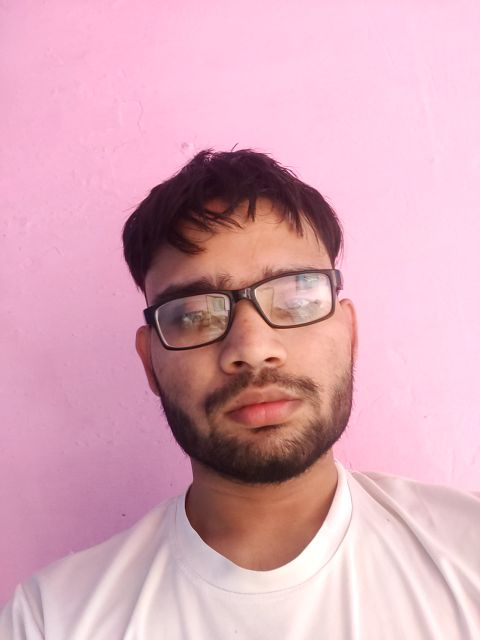

In [ ]:
from IPython.display import Image
try:
  filename = take_photo()
  print('Saved to {}'.format(filename))
  
  # Show the image which was just taken.
  display(Image(filename))
except Exception as err:
  # Errors will be thrown if the user does not have a webcam or if they do not
  # grant the page permission to access it.
  print(str(err))

**Prediction for the image captured using WebCam.**

In [ ]:
img = face_finder('/content/photo.jpg')
img[0].save('test.jpg')
img = open_image('test.jpg')
title = str(my_predictor('test.jpg'))
img.show(title=title)
plt.savefig("test_out.jpg")

**Prediction by uploading the images.**

Upload images here.

In [20]:
from google.colab import files
my_file = files.upload()

Saving images.jpeg to images.jpeg
Saving images (1).jpeg to images (1).jpeg
Saving IMG20200826185534.jpg to IMG20200826185534.jpg


**Prediction for the images uploaded above.**

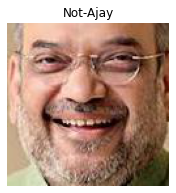

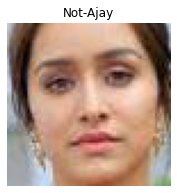

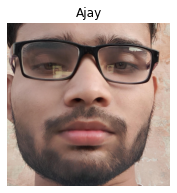

In [23]:
path = list(my_file.keys())
for pic in path:
  img = face_finder(pic)
  img[0].save('test1.jpg')
  img = open_image('test1.jpg')
  title = str(my_predictor('test1.jpg'))
  img.show(title=title)
  plt.savefig("test_out1.jpg")